# Case Study on Testing of Hypothesis

A company started to invest in digital marketing as a new way of their product
promotions. For that they collected data and decided to carry out a study on it.

1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

2. The company needs to check whether there is any dependency between the features “Region” and “Manager”.

Help the company to carry out their study with the help of data provided.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest

In [3]:
data = pd.read_csv ('Sales_add.csv')
df = pd.DataFrame(data, columns= ['Month','Region','Manager','Sales_before_digital_add(in $)','Sales_After_digital_add(in $)'])
df

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [4]:
ARegion=df[df['Region'] == 'Region - A']
BRegion=df[df['Region'] == 'Region - B']
CRegion=df[df['Region'] == 'Region - C']
ARegion

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
5,Month-6,Region - A,Manager - B,137163,256948
7,Month-8,Region - A,Manager - A,131140,230637
11,Month-12,Region - A,Manager - A,178939,276279
13,Month-14,Region - A,Manager - A,151514,253131
15,Month-16,Region - A,Manager - B,177195,187305
16,Month-17,Region - A,Manager - C,140862,234908
19,Month-20,Region - A,Manager - B,152493,212579
21,Month-22,Region - A,Manager - C,130263,243020


### 1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

[Text(0.175, 0, '0'),
 Text(1.175, 0, '1'),
 Text(2.175, 0, '2'),
 Text(3.175, 0, '3'),
 Text(4.175, 0, '4'),
 Text(5.175, 0, '5'),
 Text(6.175, 0, '6'),
 Text(7.175, 0, '7'),
 Text(8.175, 0, '8'),
 Text(9.175, 0, '9'),
 Text(10.175, 0, '10'),
 Text(11.175, 0, '11'),
 Text(12.175, 0, '12'),
 Text(13.175, 0, '13'),
 Text(14.175, 0, '14'),
 Text(15.175, 0, '15'),
 Text(16.175, 0, '16'),
 Text(17.175, 0, '17'),
 Text(18.175, 0, '18'),
 Text(19.175, 0, '19'),
 Text(20.175, 0, '20'),
 Text(21.175, 0, '21')]

<Figure size 1440x1440 with 0 Axes>

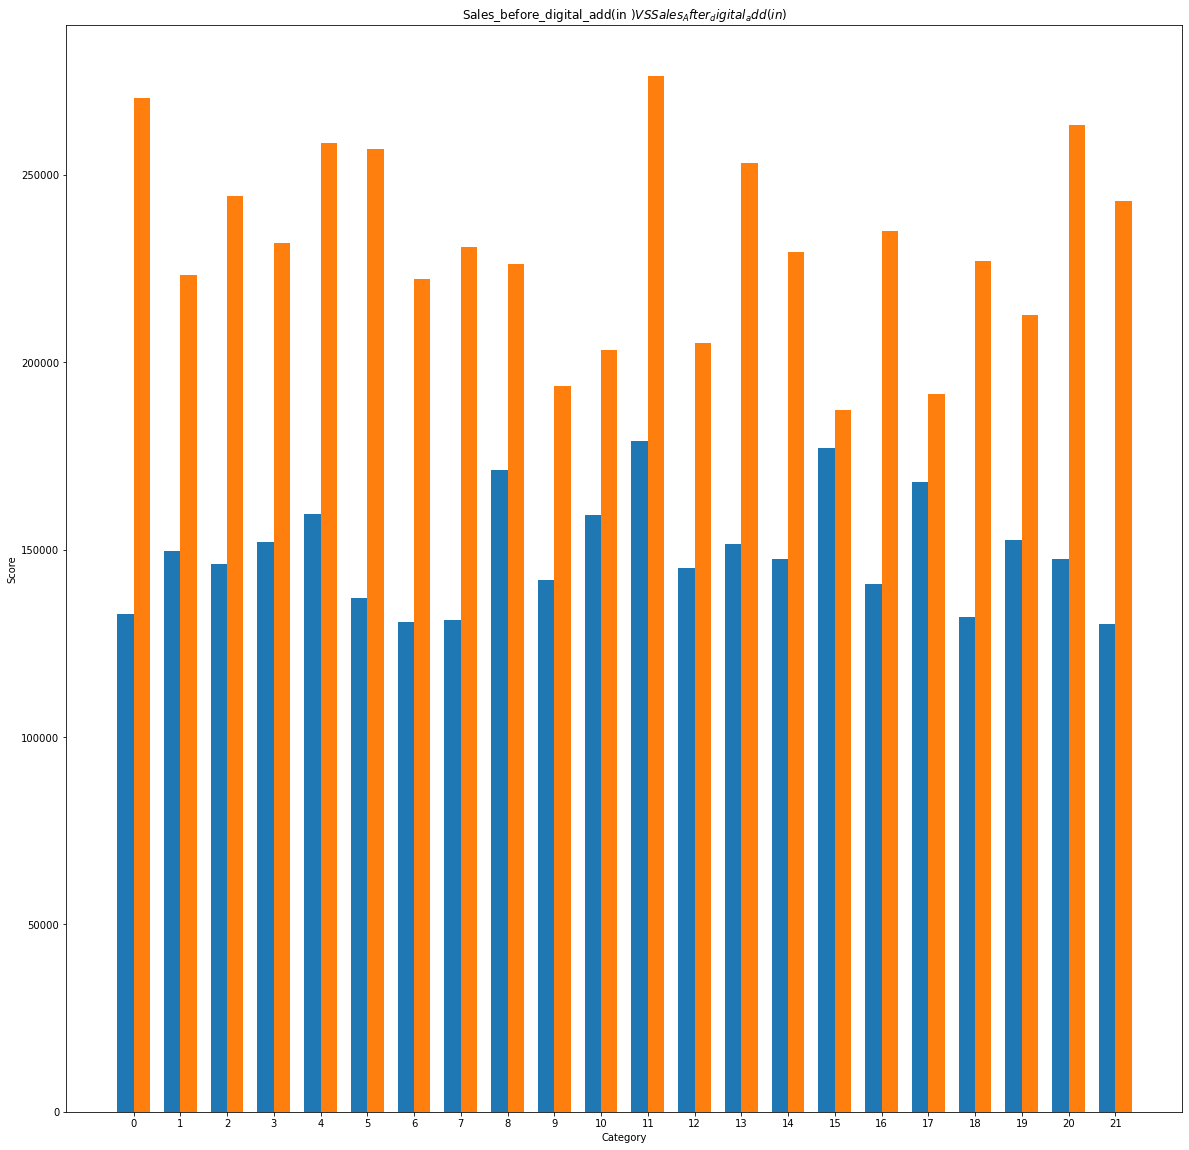

In [11]:
index = np.arange(int(len(df.index)))
bar_width = 0.35
plt.figure()
fig, ax = plt.subplots()
plt.bar(index,df['Sales_before_digital_add(in $)'], bar_width,label="Sales_before_digital_add(in $)")
plt.bar(index+bar_width,df['Sales_After_digital_add(in $)'],bar_width, label="Sales_After_digital_add(in $)")
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Sales_before_digital_add(in $) VS Sales_After_digital_add(in $)')
plt.xticks(index + bar_width / 2)
plt.rcParams['figure.figsize'] = [20, 20]
ax.set_xticklabels(index)

In [6]:
df['%increase'] = ((df['Sales_After_digital_add(in $)']-df['Sales_before_digital_add(in $)'])/df['Sales_before_digital_add(in $)'])*100
dfm= df['%increase'].mean()
print(dfm,'% increase in sale after digital add')

56.57850731561678 % increase in sale after digital add


In [7]:
from scipy.stats import linregress
linregress(df['Sales_before_digital_add(in $)'], df['Sales_After_digital_add(in $)'])

LinregressResult(slope=-0.3076102707466516, intercept=277031.47009667254, rvalue=-0.17866807113459018, pvalue=0.42629790889113295, stderr=0.37878606877227317, intercept_stderr=56796.30774339494)

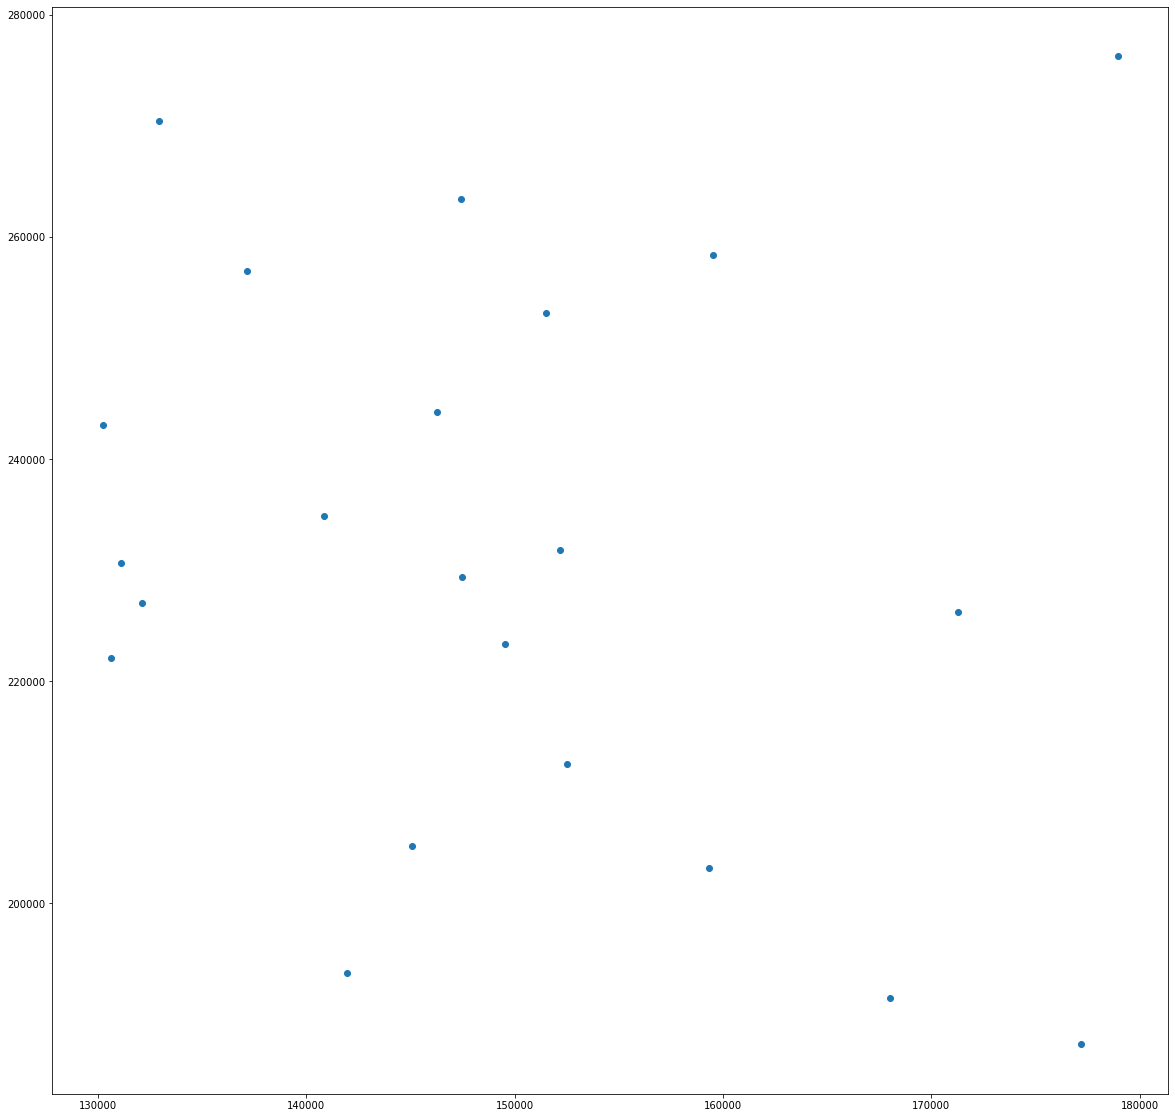

In [8]:
plt.scatter(df['Sales_before_digital_add(in $)'], df['Sales_After_digital_add(in $)'])
plt.show()

In [9]:
np.corrcoef(df['Sales_before_digital_add(in $)'], df['Sales_After_digital_add(in $)'])

array([[ 1.        , -0.17866807],
       [-0.17866807,  1.        ]])